In [ ]:
# Lectura de dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import xlwings as xw

from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

file_path = r"C:\Users\jsoli\Downloads\Resumen.xlsx"

In [2]:
# Cargar el archivo Excel
wb = xw.Book(file_path)

# Crear una lista para almacenar los resultados
resultados = []

# Iterar por todas las hojas
for hoja in wb.sheets:
    if "MASW" in hoja.name:
        ws = hoja
        # Leer valores calculados de las celdas
        z = ws.range("C9:C22").value
        Vp = ws.range("E9:E22").value
        Vs = ws.range("F9:F22").value
        
        # Agregar datos de Vs
        for i in range(len(z)):
            resultados.append([ws.name,z[i], Vs[i]])


In [3]:
# Convertir la lista en un DataFrame de pandas
df = pd.DataFrame(resultados, columns=["WGPG_ID", "Profundidad", "Valor"])

# Cerrar el archivo de Excel después de leerlo
wb.close()

In [ ]:
group = ["MASW-EST-01","MASW-EST-02"]


df_f = df[df['WGPG_ID'].isin(group)].reset_index(drop=True)

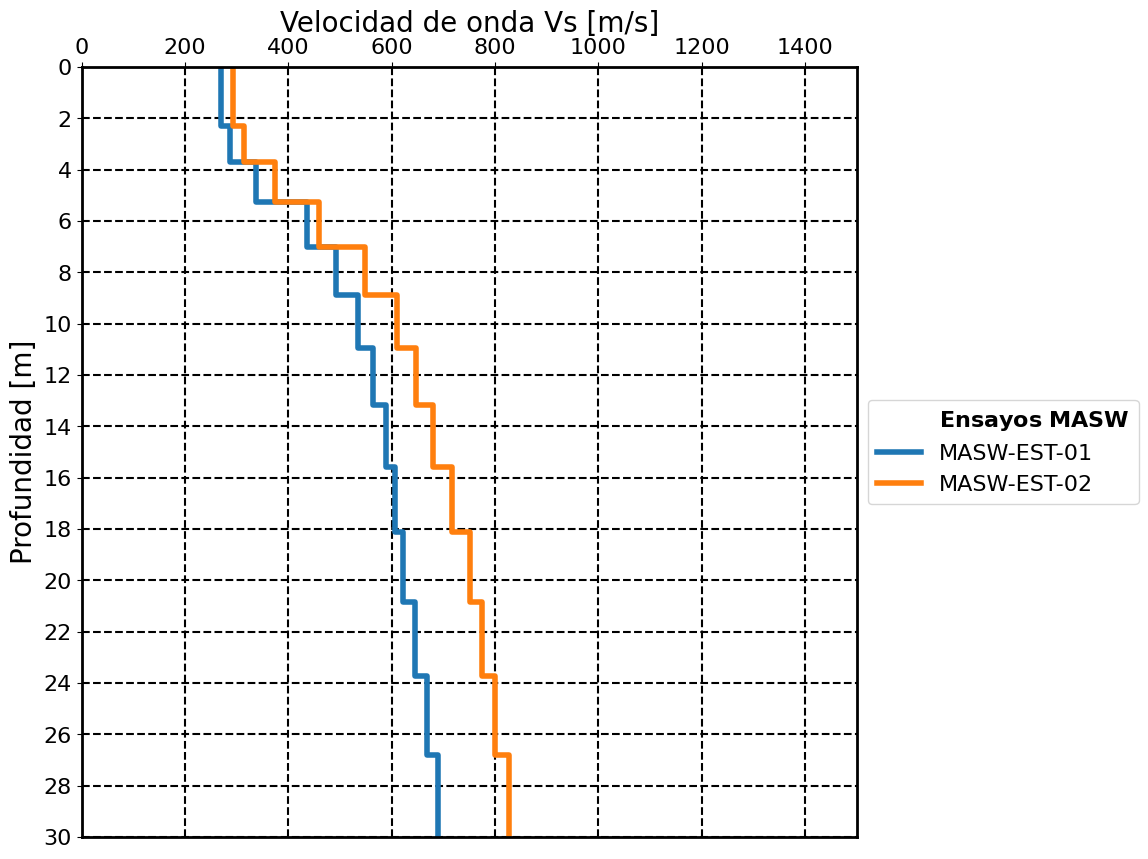

In [5]:
plt.figure(figsize=(10, 10))

for item in group:
    df_1 = df_f[df_f['WGPG_ID'].isin([item])].reset_index(drop=True)
    
    # Construcción del nuevo DataFrame
    new_rows = [(0.0, df_1.loc[0, "Valor"])]  # Primer punto (0.0, primer valor de lectura)
    for k in range(len(df_1)):
        new_rows.append((df_1.loc[k, "Profundidad"], df_1.loc[k, "Valor"]))
        if k < len(df_1) - 1:
            new_rows.append((df_1.loc[k, "Profundidad"], df_1.loc[k + 1, "Valor"]))

    # Creación del nuevo DataFrame
    df_1 = pd.DataFrame(new_rows, columns=["Profundidad", "Valor"])
                
    x = df_1["Profundidad"]
    y = df_1["Valor"]  
                    
    plt.plot(y, x, linestyle='-', linewidth=4, label=item)

# Configurar títulos y etiquetas generales
plt.ylabel("Profundidad [m]", fontsize=20)
plt.xlabel("Velocidad de onda Vs [m/s]", fontsize=20)
ax = plt.gca()  # Obtener el objeto de los ejes actuales

# Mover ejes
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Configurar ejes mayores y menores en Y
ax.yaxis.set_major_locator(MultipleLocator(2))  # Mayores cada 2 m

# Crear elementos de leyenda para los grupos
grupo_ensayos = Line2D([0], [0], color='white', linestyle='', 
                        label=r"$\bf{Ensayos\ MASW}$")

# Obtener los elementos de la leyenda existentes
handles, labels = ax.get_legend_handles_labels()

# Agregar los grupos a la leyenda
handles.insert(0, grupo_ensayos)  # Ensayos MASW

# Mostrar leyenda con los grupos
ax.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)

# Mostrar cuadrícula
plt.grid(True, which="major", axis="y", linestyle="--", linewidth=1.5, color='black')
plt.grid(True, which="major", axis="x", linestyle="--", linewidth=1.5, color='black')

# Cambiar el formato de los ejes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Cambiar el borde de la gráfica
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

# Establecer límites
ax.set_ylim(0, 30)
ax.set_xlim(0, 1500)
ax.invert_yaxis()
ax.margins(0)
plt.show()     